# OpenClassrooms - parcours Data Analyst Business Intelligence - P8

# Milestone 1 - Analyse des données

Dans cette partie nous allons analyser le jeu de données que nous avons à notre disposition. Notre objectif est de comprendre les relations entre les variables, et surtout, celles qui influent sur le prix des transactions immobilières. Grâce à ce travail, nous pourrons ne conserver que les variables qui seront utiles à l'apprentissage de notre algorithme.

## 1.Type des données

La première étape à réaliser est d'importer les données dans le notebook et d'opérer des transformations sur les variables si celles-ci s'imposent (exemple : nettoyage ou changement de type des variables, etc.).

In [1]:
%matplotlib inline

In [73]:
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#On importe les librairies que nous utiliserons pour traiter les données et les visualiser
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
# N'oubliez pas d'avoir installé les librairies pandas, numpy et matplotlib via la commande pip

#On importe les données dans un dataframe
historique_paris = pd.read_excel('historique_immobilier_paris_2017_2021.xlsx')
actifs = pd.read_excel('portefeuille_actifs.xlsx')

In [4]:
#On vérifie que le type des données attribué par pandas est cohérent
historique_paris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26196 entries, 0 to 26195
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_mutation     26196 non-null  datetime64[ns]
 1   valeur_fonciere   26196 non-null  float64       
 2   adresse_numero    26196 non-null  int64         
 3   adresse_nom_voie  26196 non-null  object        
 4   code_postal       26196 non-null  int64         
 5   nom_commune       26196 non-null  object        
 6   code_type_local   26196 non-null  int64         
 7   type_local        26196 non-null  object        
 8   surface_reelle    26196 non-null  int64         
 9   Unnamed: 9        26196 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 2.0+ MB


### 2. Regardons les différents types de biens immobiliers que nous avons dans nos données :

In [5]:
print('Pour Paris, La liste des différents types de biens immobiliers que nous avons dans les données est :')
print(historique_paris['type_local'].unique())
print('Pour Paris, On observe', historique_paris['type_local'].nunique(), 'types de biens, et leurs codes types sont', historique_paris['code_type_local'].unique(), '.')

Pour Paris, La liste des différents types de biens immobiliers que nous avons dans les données est :
['Appartement' 'Local industriel. commercial ou assimilé']
Pour Paris, On observe 2 types de biens, et leurs codes types sont [2 4] .


In [6]:
# Nombre de types de biens immobiliers et leurs codes types
nb_types_biens = len(historique_paris['code_type_local'].unique())
codes_types_biens = historique_paris['code_type_local'].unique()

print("Il y a", nb_types_biens, "types de biens immobiliers, et leurs codes types sont :", codes_types_biens)

Il y a 2 types de biens immobiliers, et leurs codes types sont : [2 4]


On observe qu'il y a ? types de biens, et que leurs codes types sont ?. 

### 3. Nombre de transactions

In [7]:
#On verifie le nombre de transactions que nous avons dans notre dataframe
print('Le nombre de transactions dans les données est :', historique_paris.shape[0])
print('Le nombre de transactions pour les appartements dans les données est :', historique_paris[historique_paris['type_local'] == 'Appartement'].shape[0])
print('Le nombre de transactions pour les locaux commerciaux dans les données est :', historique_paris[historique_paris['type_local'] == 'Local industriel. commercial ou assimilé'].shape[0])


Le nombre de transactions dans les données est : 26196
Le nombre de transactions pour les appartements dans les données est : 24353
Le nombre de transactions pour les locaux commerciaux dans les données est : 1843


### 4. interval de l'historique des données

In [8]:
# Interval de l'historique des données
print("La première date de transaction dans les données est le :", historique_paris['date_mutation'].min())
print("La dernière date de transaction dans les données est le :", historique_paris['date_mutation'].max())

La première date de transaction dans les données est le : 2017-01-02 00:00:00
La dernière date de transaction dans les données est le : 2021-12-31 00:00:00


## Commençons à analyser les données

Maintenant nous allons analyser les données historiques pour les 2 différents types de biens immobiliers en essayant d'identifier les relations entre les variables. Mais avant cela, il nous faudra pouvoir comparer les biens entre eux, et pour cela nous allons créer une colonne du prix au metre carré.

In [9]:
historique_paris.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,Unnamed: 9
0,2017-01-12,1.576492e+06,32,AV MARCEAU,75008,Paris 8e Arrondissement,2,Appartement,163,9671.732877
1,2017-01-11,3.126180e+05,155,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,32,9769.310959
2,2017-01-06,3.845522e+05,27,RUE DU COLISEE,75008,Paris 8e Arrondissement,2,Appartement,39,9860.313699
3,2017-01-23,2.867555e+05,54,RUE DE MIROMESNIL,75008,Paris 8e Arrondissement,2,Appartement,29,9888.119178
4,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,75008,Paris 8e Arrondissement,2,Appartement,66,9966.020548


In [10]:
# Calcul de la colonne prix au mètre carré pour historique_paris
historique_paris['prix_m2'] = historique_paris['valeur_fonciere'] / historique_paris['surface_reelle']

display(historique_paris[['valeur_fonciere', 'surface_reelle', 'prix_m2']].head())

,valeur_fonciere,surface_reelle,prix_m2
0,1.576492e+06,163,9671.732877
1,3.126180e+05,32,9769.310959
2,3.845522e+05,39,9860.313699
3,2.867555e+05,29,9888.119178
4,6.577574e+05,66,9966.020548


Maintenant, analysons les appartements.

### 5. Evolution du prix au metre carré des appartements dans Paris

In [11]:
#On retire les colonnes qui sont à priori inutiles ET nous allons nous concentrer sur les appartements dans un premier temps
appartements_paris = historique_paris[historique_paris['type_local'] == 'Appartement']
appartements_paris.shape[0]

24353

In [12]:
#Préparons un dataframe en regroupant les prix moyens de ventes des appartements par année avec la surface moyenne associée
prix_m2_moyen_par_annee = appartements_paris.groupby(appartements_paris['date_mutation'].dt.year)['prix_m2'].mean().reset_index()
print("Prix moyen au mètre carré des appartements à Paris :\n")
prix_m2_moyen_par_annee

Prix moyen au mètre carré des appartements à Paris :



,date_mutation,prix_m2
0,2017,9492.859195
1,2018,10031.403432
2,2019,10562.712581
3,2020,10674.872650
4,2021,10455.600126


On constate sur la moyenne des prix de vente des appartements à Paris que ? <br>
Nous allons créer un graphique pour mieux le visualiser.

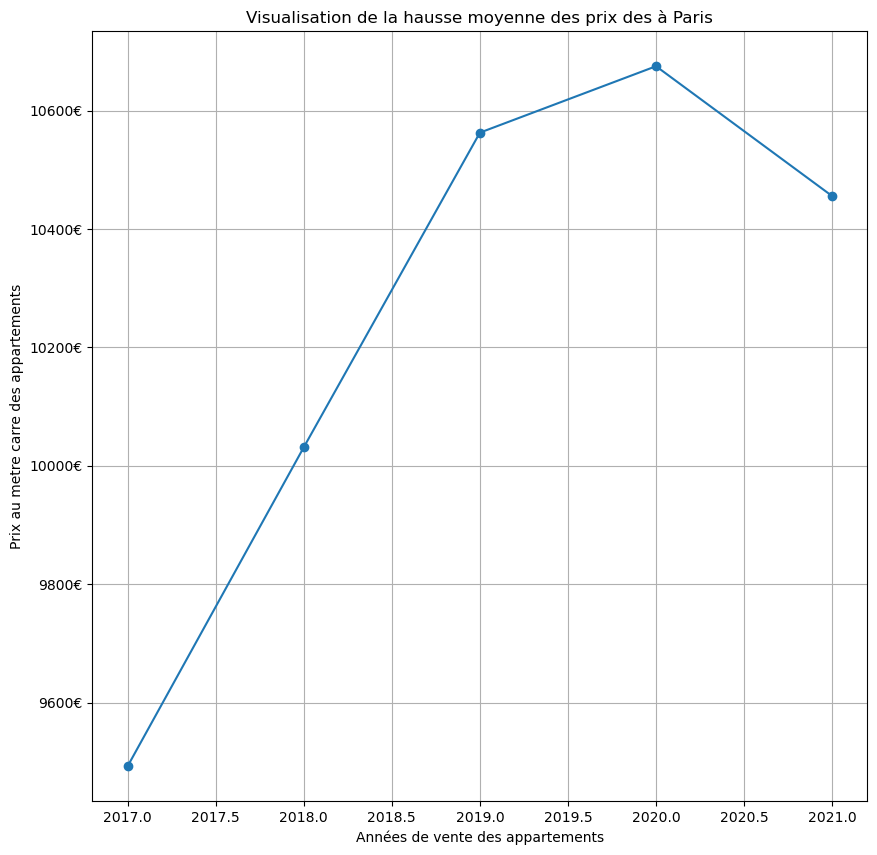

In [16]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10,10))
plt.plot(prix_m2_moyen_par_annee['date_mutation'], prix_m2_moyen_par_annee['prix_m2'], marker='o')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('%d€')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix des à Paris')
plt.show()

### 6. Différences de prix au metre carré entre les arrondissements

Maintenant nous allons chercher à afficher l'évolution des prix par arrondissement. Vérifions la liste des arrondissements que nous avons dans nos données. Normalement à Paris nous avons 20 codes postaux différents, 1 par arrondissement allant de 75001 à 75020.

In [17]:
#Liste des codes postaux dans nos données.
cp_paris = historique_paris['code_postal'].unique()
print(cp_paris)

[75008 75003 75001 75006 75005 75007 75010 75009 75011 75012 75013 75014
 75015 75016 75017 75018 75020 75019 75004 75002]


In [18]:
#Créeons un dataframe pour une deuxième visualisation avec l'evolution des prix par arrondissement
prix_m2_par_arrondissement = historique_paris.groupby(['code_postal', historique_paris['date_mutation'].dt.year])['prix_m2'].mean().reset_index()

prix_m2_par_arrondissement

,code_postal,date_mutation,prix_m2
0,75001,2017,11922.188525
1,75001,2018,12818.040395
2,75001,2019,13458.519921
3,75001,2020,13461.839382
4,75001,2021,13602.673724
...,...,...,...
95,75020,2017,7896.420793
96,75020,2018,8515.035199
97,75020,2019,9134.986939
98,75020,2020,9363.364654


In [19]:
# Création de df avec uniquement les données du 1er
prix_m2_75001 = prix_m2_par_arrondissement[prix_m2_par_arrondissement['code_postal'] == 75001]

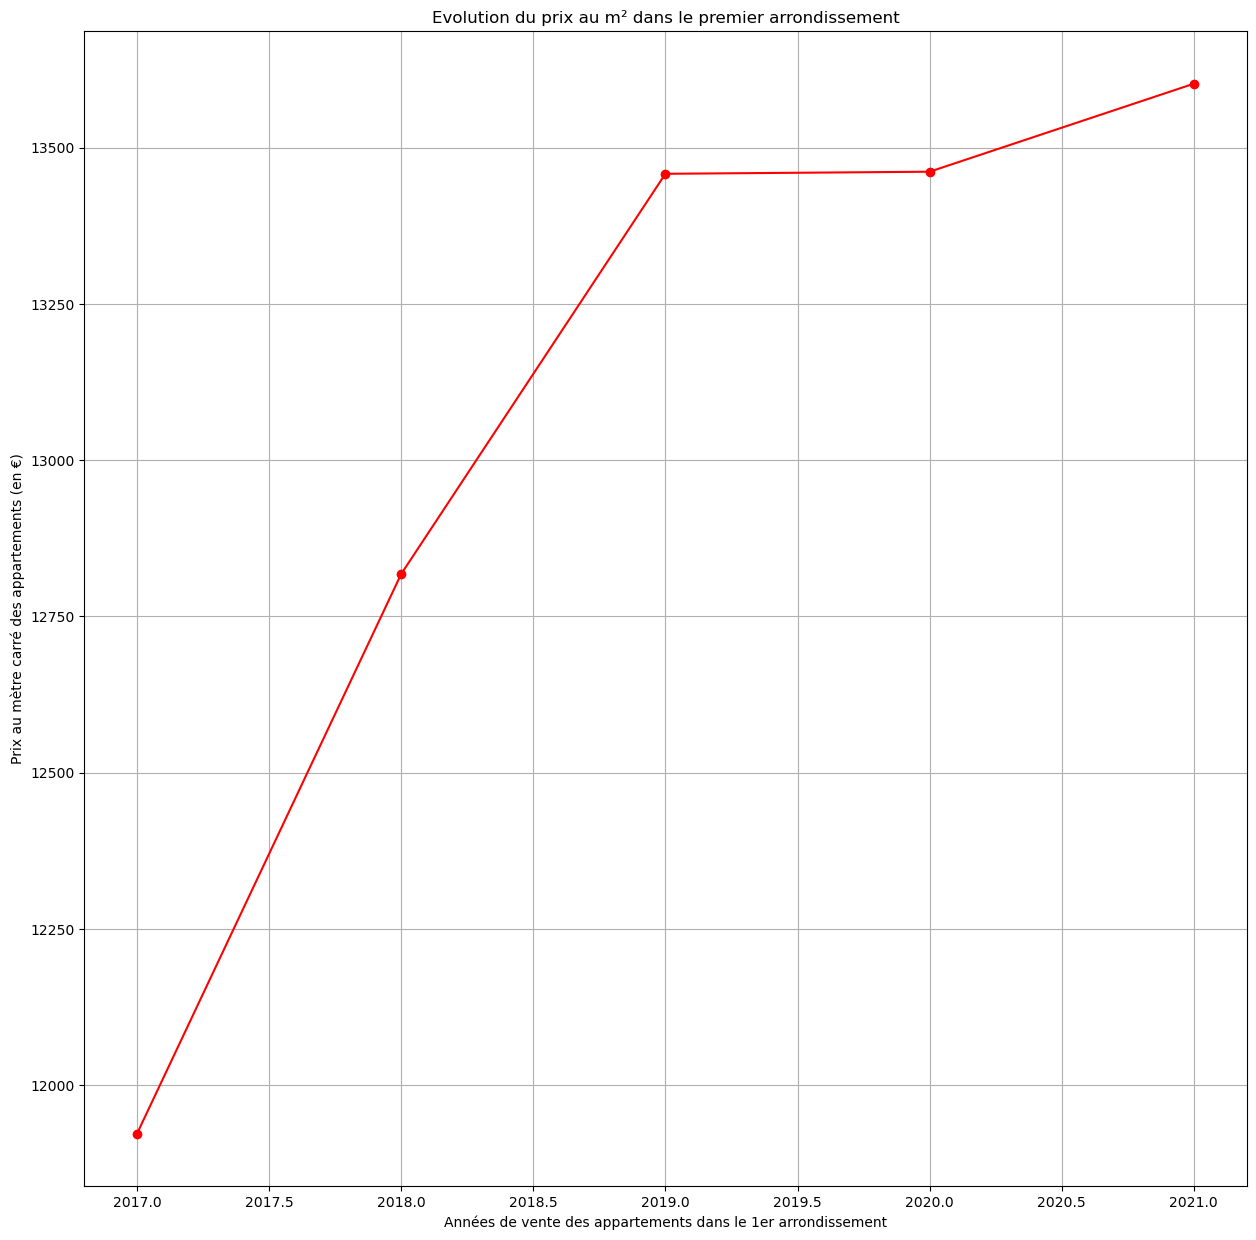

In [20]:
# Création d'un graphique pour visualiser l'évolution de la moyenne des prix au mètre carré dans le premier arrondissement
plt.figure(figsize=(15,15))
plt.plot(prix_m2_75001['date_mutation'], prix_m2_75001['prix_m2'], color='red', marker='o')
plt.xlabel('Années de vente des appartements dans le 1er arrondissement')
plt.ylabel('Prix au mètre carré des appartements (en €)')
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

Nous allons ajouter à cette visualisation tous les autres arrondissement avec une couleur différente.

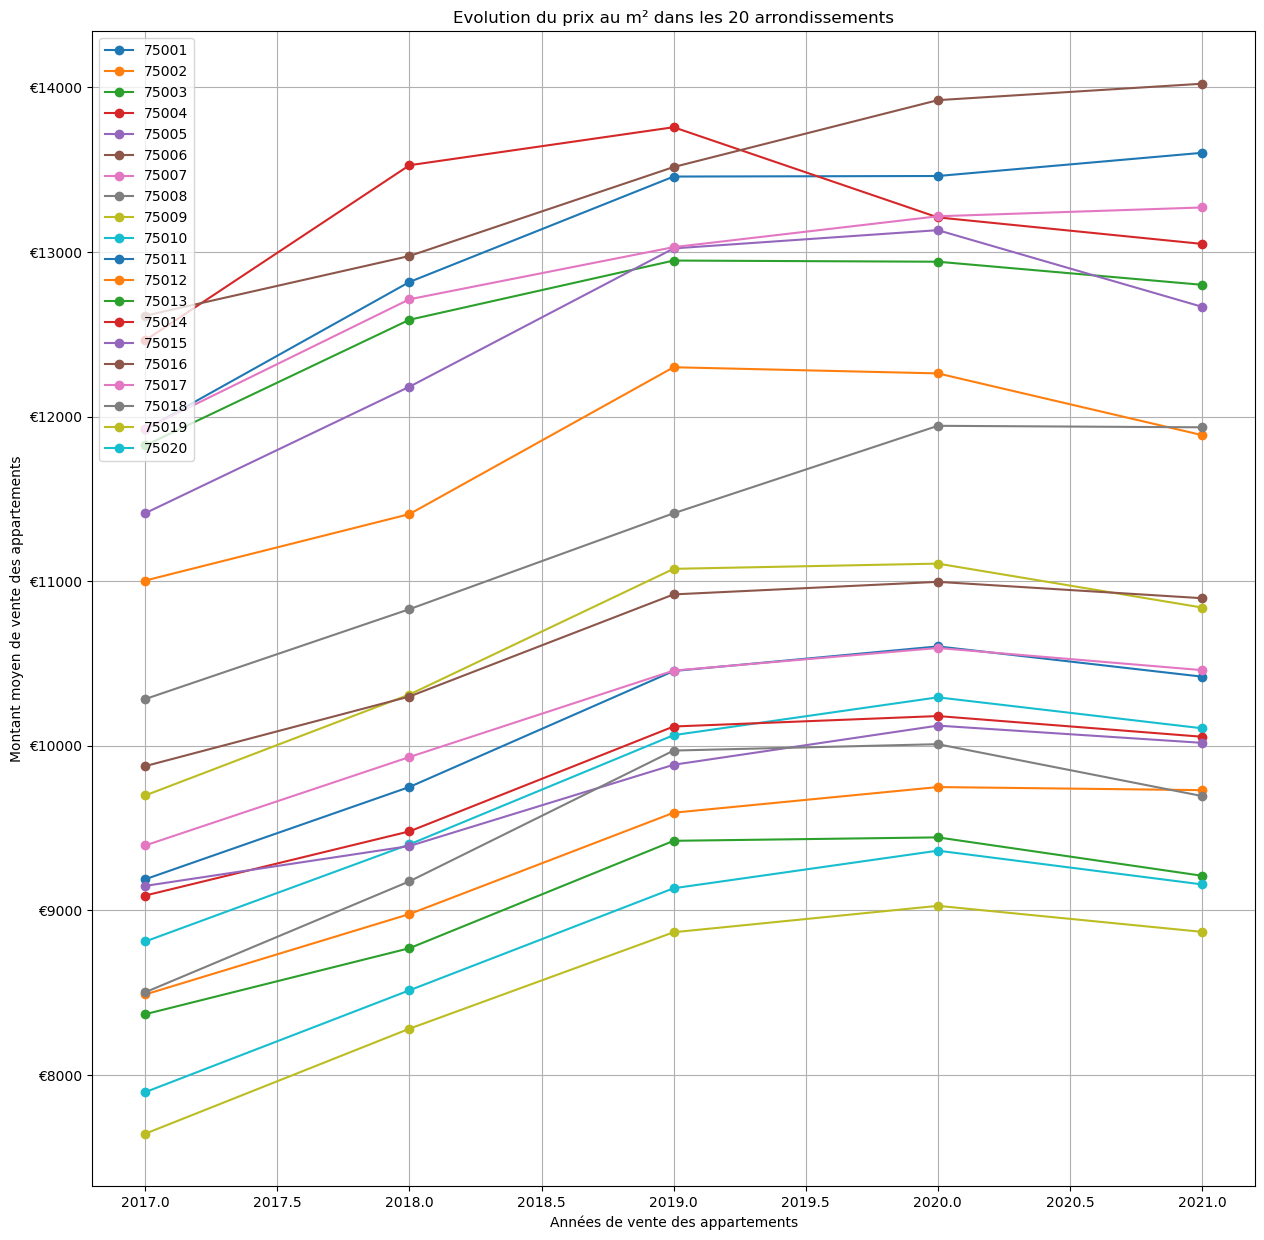

In [21]:
#On affiche l'évolution du prix au m² par arrondissement dans Paris
plt.figure(figsize=(15,15))

# Liste des codes postaux des 20 arrondissements de Paris
codes_postaux_paris = ['75001', '75002', '75003', '75004', '75005', '75006', '75007', '75008', '75009', '75010',
                       '75011', '75012', '75013', '75014', '75015', '75016', '75017', '75018', '75019', '75020']

# Boucle pour parcourir chaque arrondissement
for code_postal in codes_postaux_paris:
    prix_m2_arrondissement = prix_m2_par_arrondissement[prix_m2_par_arrondissement['code_postal'] ==int(code_postal)]
    
    # Calcul de la moyenne du prix au mètre carré pour chaque année
    moyenne_prix_m2 = prix_m2_arrondissement.groupby('date_mutation')['prix_m2'].mean()
    
    # Moyenne du prix au m2 par arrondissement
    plt.plot(moyenne_prix_m2.index, moyenne_prix_m2.values, label=f'{code_postal}', marker='o')

plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.show()

On observe que globalement que ?

### 7. Prix au metre carré par transaction dans un arrondissement

In [22]:
#Vérifions le nombre de transaction dans le 6ème car le prix semble élevé
transactions_6eme = historique_paris[historique_paris['code_postal'] == 75006]

# Comptage du nombre de transactions dans le 6ème arrondissement
nombre_transactions_6eme = len(transactions_6eme)

# Affichage du nombre de transactions dans le 6ème arrondissement
print('Le nombre de transactions dans le 6ème arrondissement est :', nombre_transactions_6eme)


Le nombre de transactions dans le 6ème arrondissement est : 782


On constate que ?

Affichons l'historique des transactions pour visualiser la dispersion des données :

<Figure size 1500x1500 with 0 Axes>

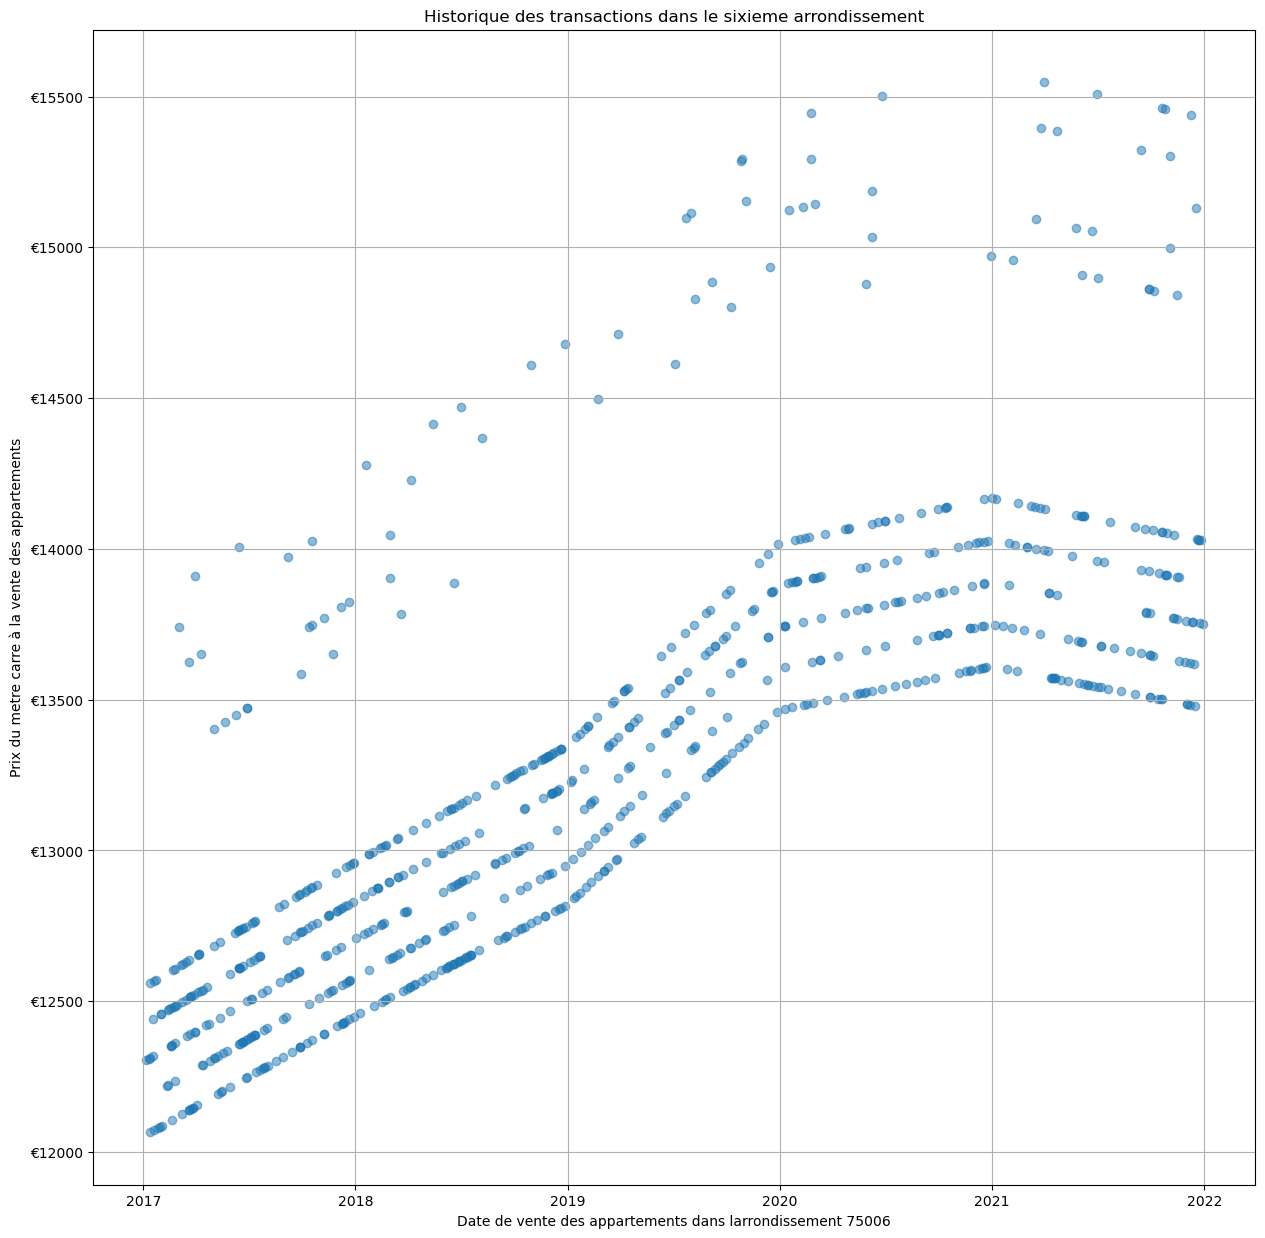

In [23]:
cp=75006
plt.figure(figsize=(15,15))
#Insérer ci-dessous le scatter plot

# Tracé du nuage de points
plt.figure(figsize=(15, 15))
plt.scatter(transactions_6eme['date_mutation'], transactions_6eme['valeur_fonciere'] / transactions_6eme['surface_reelle'], alpha=0.5)
plt.xlabel('Date de vente des appartements dans larrondissement 75006')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

On observe que ?

Pour nous rassurer sur la relation entre les données nous allons utiliser un test statistique de corrélation.

### 8. Vérification de la relation entre le prix au m² et la date dans le 6ème arrondissement par le calcul du coefficient de corrélation de Pearson 

Pour cette distribution nous allons calculer le coefficient de corrélation de Pearson. La relation entre le prix au metre carré et la date n'est pas forcément linéaire mais elle s'en rapproche suffisamment pour que cette analyse soit pertinente (voir l'évolution du prix au metre carré globale montrée plus haut, on a presque une droite sauf entre 2020 et 2021). Ce qui nous interesse c'est de prouver que le temps a une influence sur le prix.

## Corrélation de Pearson

In [24]:
#On calcule la corrélation de Pearson
from scipy import stats
from scipy.stats import pearsonr

# Sélection des données pertinentes
prix_m2_6eme = transactions_6eme['prix_m2']
dates_6eme = transactions_6eme['date_mutation']

# Calcul de la corrélation de Pearson
correlation_coefficient, p_value = pearsonr(dates_6eme, prix_m2_6eme)

# Affichage du résultat
print("Coefficient de corrélation de Pearson :", correlation_coefficient)
print("Valeur p associée :", p_value)



UFuncTypeError: ufunc 'add' cannot use operands with types dtype('float64') and dtype('<M8[ns]')

Le coefficient de corrélation est de ? avec une pvalue de ? donc nous pouvons confirmer la corrélation.

# Les valeurs ne sont pas du meme type, il faut changer le format des dates

In [25]:
prix_m2_6eme.info()

<class 'pandas.core.series.Series'>
Index: 782 entries, 846 to 25020
Series name: prix_m2
Non-Null Count  Dtype  
--------------  -----  
782 non-null    float64
dtypes: float64(1)
memory usage: 12.2 KB


In [26]:
# Conversion des dates en nombres de jours
reference_date = dates_6eme.min()
dates = (dates_6eme - reference_date).dt.days

# Calcul de la corrélation de Pearson
correlation_coefficient, p_value_p = pearsonr(dates, prix_m2_6eme)

# Affichage du résultat
print("Coefficient de corrélation de Pearson :", correlation_coefficient)
print("Valeur p associée :", p_value_p)


Coefficient de corrélation de Pearson : 0.7711785955434651
Valeur p associée : 3.928545168674273e-155


In [27]:
'%f' % (p_value_p)

'0.000000'

# Corrélation de Spearman

In [28]:
from scipy.stats import spearmanr

correlation_coefficient, p_value_s = spearmanr(dates, prix_m2_6eme)

print("Coefficient de corrélation de Spearman :", correlation_coefficient)
print("Valeur p associée :", p_value_s)


Coefficient de corrélation de Spearman : 0.8314762990073339
Valeur p associée : 2.666549347639287e-201


In [29]:
'%f' % (p_value_s)

'0.000000'

### 9. Vérification de la relation entre la valeur fonciere et la surface

In [30]:
# Calcul de la corrélation de Pearson entre la valeur foncière et la surface
correlation_coefficient_valeur_surface, p_value = pearsonr(historique_paris['valeur_fonciere'], historique_paris['surface_reelle'])

# Affichage des résultats
print("Coefficient de corrélation de Pearson :", correlation_coefficient_valeur_surface)
print("Valeur p associée :", p_value)


Coefficient de corrélation de Pearson : 0.9835604610065002
Valeur p associée : 0.0


Le coefficient de corrélation est de ? avec une pvalue de ?. La relation est donc confirmée.

Regardons maintenant si le type de bien à une influence sur le prix au metre carré également.

### 10. Analyse des locaux industriels, commerciaux et assimilés 

In [31]:
#On crée un dataset qui ne contient que les locaux commerciaux
locaux_commerciaux = historique_paris[historique_paris['type_local'] == 'Local industriel. commercial ou assimilé']
locaux_commerciaux.head()

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,code_type_local,type_local,surface_reelle,Unnamed: 9,prix_m2
138,2017-03-09,3.623842e+05,33,RUE DE RICHELIEU,75001,Paris 1er Arrondissement,4,Local industriel. commercial ou assimilé,29,12496.006027,12496.006027
154,2017-07-07,2.407068e+05,46,RUE CROIX DES PETITS CHAMPS,75001,Paris 1er Arrondissement,4,Local industriel. commercial ou assimilé,19,12668.781370,12668.781370
181,2017-06-21,1.277609e+06,18,RUE MONTMARTRE,75001,Paris 1er Arrondissement,4,Local industriel. commercial ou assimilé,99,12905.144548,12905.144548
182,2017-12-22,7.100867e+05,21,BD DE SEBASTOPOL,75001,Paris 1er Arrondissement,4,Local industriel. commercial ou assimilé,55,12910.666849,12910.666849
184,2017-10-11,9.186232e+05,45,RUE COQUILLIERE,75001,Paris 1er Arrondissement,4,Local industriel. commercial ou assimilé,71,12938.355507,12938.355507


In [32]:
#Préparons un dataframe en regroupant les prix au metre carré moyens des ventes par année

#création de colonne d'année
locaux_commerciaux['année'] =locaux_commerciaux['date_mutation'].dt.year

#calcul de la moyenne des prix au mètre carré
prix_m2_par_annee_locaux_commerciaux = locaux_commerciaux.groupby('année')['prix_m2'].mean().reset_index()
prix_m2_par_annee_locaux_commerciaux


C:\Users\lamg1\AppData\Local\Temp\ipykernel_9792\2702196056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locaux_commerciaux['année'] =locaux_commerciaux['date_mutation'].dt.year


,année,prix_m2
0,2017,10949.909217
1,2018,11569.499180
2,2019,11960.132050
3,2020,11966.470204
4,2021,12006.488691


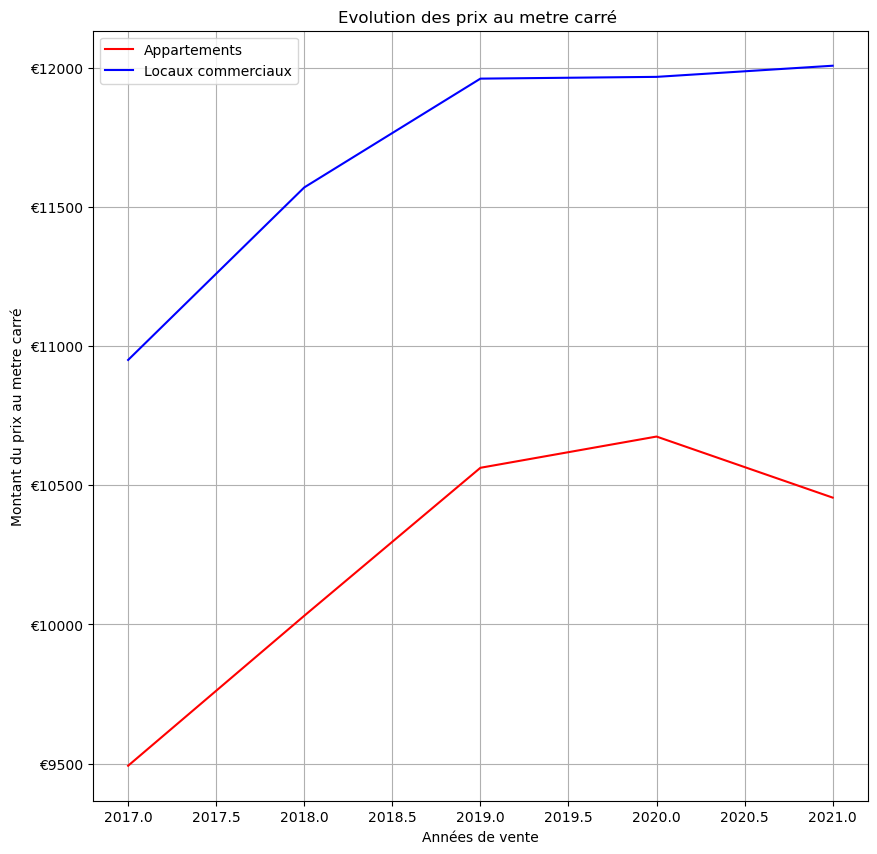

In [33]:
#Création d'un graphique pour visualiser la hausse de la moyenne des prix
plt.figure(figsize=(10,10))
plt.plot(prix_m2_moyen_par_annee['date_mutation'], prix_m2_moyen_par_annee['prix_m2'], label='Appartements', color='red')
plt.plot(prix_m2_par_annee_locaux_commerciaux['année'], prix_m2_par_annee_locaux_commerciaux['prix_m2'], label='Locaux commerciaux', color='blue')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

Le prix au metre carré des locaux commerciaux est ?

In [34]:
prix_m2_moyen_locaux_commerciaux = prix_m2_par_annee_locaux_commerciaux['prix_m2'].mean()
print('Le prix au metre carré des locaux commerciaux est',prix_m2_moyen_locaux_commerciaux)

Le prix au metre carré des locaux commerciaux est 11690.499868512563


Après ces analyses, nous pouvons conclure que les dimensions à utiliser pour prédire le prix au m² sont : 
- la surface du bien immobilier,
- la date considérée, 
- la localisation (code_postal), 
- le type de bien.

# Milestone 2 - Entraînement de l'algorithme

Dans cette section nous allons maintenant entrâiner un algorithme à prédire la valeur fonciere d'un bien immobilier. Pour cela nous allons utiliser l'algorithme de régression linéaire.

On commence par préparer nos données en transformant les colonnes catégoriques du code postal et du type de local grâce au one hot encoder (sklearn) / get_dummies (pandas)

In [35]:
from sklearn.preprocessing import OneHotEncoder

données_transformées = pd.get_dummies(historique_paris, columns=['code_postal', 'type_local'])
données_entrainement = données_transformées.drop('valeur_fonciere', axis=1)

In [36]:
# Définir la date de référence comme la première date dans la colonne date_mutation
reference_date = données_entrainement['date_mutation'].min()

# Calculer le nombre de jours écoulés depuis la date de référence
données_entrainement['jours_depuis_reference'] = (données_entrainement['date_mutation'] - reference_date).dt.days

# Suppression de la colonne date_mutation car elle n'est plus utile
données_entrainement.drop('date_mutation', axis=1, inplace=True)

In [37]:
données_entrainement

,adresse_numero,adresse_nom_voie,nom_commune,code_type_local,surface_reelle,Unnamed: 9,prix_m2,code_postal_75001,code_postal_75002,code_postal_75003,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,jours_depuis_reference
0,32,AV MARCEAU,Paris 8e Arrondissement,2,163,9671.732877,9671.732877,False,False,False,...,False,False,False,False,False,False,False,True,False,10
1,155,RUE DU FAUBOURG SAINT HONORE,Paris 8e Arrondissement,2,32,9769.310959,9769.310959,False,False,False,...,False,False,False,False,False,False,False,True,False,9
2,27,RUE DU COLISEE,Paris 8e Arrondissement,2,39,9860.313699,9860.313699,False,False,False,...,False,False,False,False,False,False,False,True,False,4
3,54,RUE DE MIROMESNIL,Paris 8e Arrondissement,2,29,9888.119178,9888.119178,False,False,False,...,False,False,False,False,False,False,False,True,False,21
4,52,RUE DU FAUBOURG SAINT HONORE,Paris 8e Arrondissement,2,66,9966.020548,9966.020548,False,False,False,...,False,False,False,False,False,False,False,True,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26191,16,RUE DU BOURG TIBOURG,Paris 4e Arrondissement,2,37,12735.781918,12735.781918,False,False,False,...,False,False,False,False,False,False,False,True,False,1515
26192,23,RUE DU SENTIER,Paris 2e Arrondissement,4,150,13215.536370,13215.536370,False,True,False,...,False,False,False,False,False,False,False,False,True,1507
26193,5,RUE SAINT-SAUVEUR,Paris 2e Arrondissement,2,26,12016.765753,12016.765753,False,True,False,...,False,False,False,False,False,False,False,True,False,1526
26194,15,RUE BLONDEL,Paris 2e Arrondissement,2,13,12017.182877,12017.182877,False,True,False,...,False,False,False,False,False,False,False,True,False,1529


In [43]:
données_transformées

,date_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,nom_commune,code_type_local,surface_reelle,Unnamed: 9,prix_m2,code_postal_75001,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,2017-01-12,1.576492e+06,32,AV MARCEAU,Paris 8e Arrondissement,2,163,9671.732877,9671.732877,False,...,False,False,False,False,False,False,False,False,True,False
1,2017-01-11,3.126180e+05,155,RUE DU FAUBOURG SAINT HONORE,Paris 8e Arrondissement,2,32,9769.310959,9769.310959,False,...,False,False,False,False,False,False,False,False,True,False
2,2017-01-06,3.845522e+05,27,RUE DU COLISEE,Paris 8e Arrondissement,2,39,9860.313699,9860.313699,False,...,False,False,False,False,False,False,False,False,True,False
3,2017-01-23,2.867555e+05,54,RUE DE MIROMESNIL,Paris 8e Arrondissement,2,29,9888.119178,9888.119178,False,...,False,False,False,False,False,False,False,False,True,False
4,2017-01-10,6.577574e+05,52,RUE DU FAUBOURG SAINT HONORE,Paris 8e Arrondissement,2,66,9966.020548,9966.020548,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26191,2021-02-25,4.712239e+05,16,RUE DU BOURG TIBOURG,Paris 4e Arrondissement,2,37,12735.781918,12735.781918,False,...,False,False,False,False,False,False,False,False,True,False
26192,2021-02-17,1.982330e+06,23,RUE DU SENTIER,Paris 2e Arrondissement,4,150,13215.536370,13215.536370,False,...,False,False,False,False,False,False,False,False,False,True
26193,2021-03-08,3.124359e+05,5,RUE SAINT-SAUVEUR,Paris 2e Arrondissement,2,26,12016.765753,12016.765753,False,...,False,False,False,False,False,False,False,False,True,False
26194,2021-03-11,1.562234e+05,15,RUE BLONDEL,Paris 2e Arrondissement,2,13,12017.182877,12017.182877,False,...,False,False,False,False,False,False,False,False,True,False


In [42]:
#conversion des données en str
données_entrainement = données_entrainement.astype(str)

In [44]:
# Convertir les valeurs True/False en 1/0
données_entrainement = données_entrainement.replace({'True': 1, 'False': 0})

In [45]:
colonnes_a_supprimer = ['adresse_numero', 'adresse_nom_voie', 'nom_commune', 'code_type_local','Unnamed: 9','prix_m2']
données_entrainement = données_entrainement.drop(colonnes_a_supprimer, axis=1)

In [46]:
données_transformées = données_transformées.drop(colonnes_a_supprimer, axis=1)

In [47]:
X = données_entrainement
y = données_transformées['valeur_fonciere']

In [48]:
X

,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,jours_depuis_reference
0,163,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,10
1,32,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,9
2,39,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,4
3,29,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,21
4,66,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26191,37,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1515
26192,150,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1507
26193,26,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1526
26194,13,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1529


In [72]:
y

0       1576492.46
1        312617.95
2        384552.23
3        286755.46
4        657757.36
           ...    
26191    471223.93
26192   1982330.46
26193    312435.91
26194    156223.38
26195    369429.37
Name: valeur_fonciere, Length: 26196, dtype: float64

On utilise le train_test_split pour prélever un tiers de nos données (33%) et les garder de côté. Nous allons entraîner notre algorithme sur le reste des données et puis mesurer notre erreur moyenne en pourcentage de la valeur foncière

In [50]:
# On importe le train test split de la librairie sk_learn
from sklearn.model_selection import train_test_split

# La valeur y à trouver est la valeur foncière
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)


In [51]:
#On entraîne l'algorithme ci-dessous et on effectue la prédiction

from sklearn.linear_model import LinearRegression

modele = LinearRegression()

modele.fit(X_train, y_train)

# Prédiction sur les données de test
predictions = modele.predict(X_test)
print(predictions[:5])

print(modele.score(X_test, y_test))
print(modele.score(X_train, y_train))

[198706.13031801 397040.05042633 368408.74325177 179416.90180084
 282372.8187559 ]
0.9836368885788158
0.9807927616827812


In [52]:
from sklearn.metrics import mean_absolute_percentage_error

# Calcul de l'erreur moyenne en pourcentage
erreur_moyenne = mean_absolute_percentage_error(y_test, predictions)

# Affichage du résultat
print(f"Notre algorithme fait donc {erreur_moyenne * 100}% d'erreur en moyenne sur la prédiction de la valeur foncière.")

Notre algorithme fait donc 9.10664132336087% d'erreur en moyenne sur la prédiction de la valeur foncière.


In [53]:
(np.mean(abs(y_test-predictions)/y_test))*100

9.10664132336087

Notre algorithme fait donc ? % d'erreur en moyenne sur la prédiction de la valeur foncière.

Mes conclusions sur ce résultat et comment j'aurais pu aller plus loin :
- ?


# Milestone 3 - Prédiction définitive pour le client 

Nous avons récupéré le fichier avec le portefeuille des actifs de la société. Nous allons l'importer puis effectuer la prédiction et statuer sur la branche qui, selon notre prédiction, aura le plus de valeur à la date demandée c'est à dire au 31 décembre 2022.<br>
Petite précision, nous souhaitons continuer à utiliser la surface réelle pour faire les calculs et pas la surface carrez. 

In [54]:
#On importe les données dans un dataframe
actifs = pd.read_excel('portefeuille_actifs.xlsx')
actifs

,adresse_numero,adresse_nom_voie,code_postal,code_commune,nom_commune,surface_carrez,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,127,RUE SAINT-DENIS,75001,75101,Paris 1er Arrondissement,16.41,2,Appartement,25,1,2.349593,48.863227
1,62,RUE NOTRE-DAME DE NAZARETH,75003,75103,Paris 3e Arrondissement,20.47,2,Appartement,22,1,2.356977,48.867907
2,62,RUE DE TURENNE,75003,75103,Paris 3e Arrondissement,64.48,2,Appartement,65,3,2.364855,48.859318
3,32,AV GEORGE V,75008,75108,Paris 8e Arrondissement,63.29,2,Appartement,74,2,2.301586,48.868893
4,152,BD HAUSSMANN,75008,75108,Paris 8e Arrondissement,20.58,2,Appartement,22,1,2.311643,48.875490
...,...,...,...,...,...,...,...,...,...,...,...,...
270,15,AV DE LAUMIERE,75019,75119,Paris 19e Arrondissement,14.12,4,Local industriel. commercial ou assimilé,16,0,2.380450,48.883397
271,3,RUE SAINT-JOSEPH,75002,75102,Paris 2e Arrondissement,14.10,4,Local industriel. commercial ou assimilé,15,0,2.345110,48.868196
272,2,RUE GRETRY,75002,75102,Paris 2e Arrondissement,34.85,4,Local industriel. commercial ou assimilé,35,0,2.337593,48.870514
273,115,RUE D ABOUKIR,75002,75102,Paris 2e Arrondissement,41.61,4,Local industriel. commercial ou assimilé,49,0,2.349804,48.868784


Nous avons la liste des biens immobiliers de l'entreprise. Pour effectuer une prédiction, nous devons mettre ce fichier au même format que le dataframe que nous avons utilisé lors de l'entraînement de l'algorithme.

In [55]:
#On réutilise les mêmes fonctions pour faire le one hot encoding des variables catégorielles

# On sélectionne la colonne pertinente dans le dataframe actifs
colonnes_pertinentes = ['surface_reelle_bati']

# Sélectionner les colonnes catégorielles pour le one hot encoding
colonnes_catégorielles = ['code_postal', 'type_local']

# Appliquer le one hot encoding sur les colonnes catégorielles
actifs_encoded = pd.get_dummies(actifs[colonnes_catégorielles], columns=colonnes_catégorielles, prefix=['code_postal', 'type_local'])

# Concaténer les colonnes one hot encoded avec le reste du dataframe
actifs_encoded = pd.concat([actifs[colonnes_pertinentes], actifs_encoded], axis=1)

actifs_encoded

,surface_reelle_bati,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75013,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé
0,25,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,22,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,65,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,74,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,22,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,16,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
271,15,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
272,35,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
273,49,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [56]:
#On importe la librairie datetime pour pouvoir créer une colonne timestamp avec la date du 31 décembre 2022 pour la prédiction
import datetime as dt
date_prediction = dt.datetime(2022, 12, 31)
actifs_encoded['date_prediction'] = date_prediction
actifs_encoded

,surface_reelle_bati,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,date_prediction
0,25,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,2022-12-31
1,22,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,2022-12-31
2,65,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,2022-12-31
3,74,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,2022-12-31
4,22,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,2022-12-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,16,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,2022-12-31
271,15,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,2022-12-31
272,35,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,2022-12-31
273,49,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,2022-12-31


In [57]:
# Convertir la colonne datetime64[us] en int32 (à la suite d'une erreur affichée)
actifs_encoded['date_prediction'] = actifs_encoded['date_prediction'].astype('int64').astype('int32')

In [58]:
# Convertir les valeurs True/False en 1/0
actifs_encoded = actifs_encoded.astype(int)

In [59]:
# On renomme la colonne "surface_reelle_bati" en "surface_reelle"
actifs_encoded.rename(columns={'surface_reelle_bati': 'surface_reelle'}, inplace=True)

In [60]:
# Convertir la colonne "date_prediction" en format datetime
actifs_encoded['date_prediction'] = pd.to_datetime(actifs_encoded['date_prediction'])
actifs_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   surface_reelle                                       275 non-null    int32         
 1   code_postal_75001                                    275 non-null    int32         
 2   code_postal_75002                                    275 non-null    int32         
 3   code_postal_75003                                    275 non-null    int32         
 4   code_postal_75004                                    275 non-null    int32         
 5   code_postal_75005                                    275 non-null    int32         
 6   code_postal_75006                                    275 non-null    int32         
 7   code_postal_75007                                    275 non-null    int32         
 8   

In [61]:
# On définit la date de référence pour les prédictions, pour avoir le même format que dans l'algorithme
reference_date_prediction = historique_paris['date_mutation'].min()

In [62]:
# Convertir la date de référence en format datetime
reference_date_prediction = pd.to_datetime(reference_date_prediction)

In [64]:
# Calculer le nombre de jours écoulés depuis la date de référence jusqu'à la date de chaque prédiction
actifs_encoded['jours_depuis_reference'] = (reference_date_prediction - actifs_encoded['date_prediction']).dt.days

In [65]:
#Conversion du dataframe en str
actifs_encoded = actifs_encoded.astype(str)
actifs_encoded

,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,date_prediction,jours_depuis_reference
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1970-01-01 00:00:01.714806784,17167
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1970-01-01 00:00:01.714806784,17167
2,65,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1970-01-01 00:00:01.714806784,17167
3,74,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1970-01-01 00:00:01.714806784,17167
4,22,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1970-01-01 00:00:01.714806784,17167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1970-01-01 00:00:01.714806784,17167
271,15,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1970-01-01 00:00:01.714806784,17167
272,35,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1970-01-01 00:00:01.714806784,17167
273,49,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1970-01-01 00:00:01.714806784,17167


In [66]:
# Sauvegarder la colonne date_prediction dans une autre structure de données
date_prediction = actifs_encoded['date_prediction']

# Supprimer les colonnes date_prediction et valeur_fonciere du dataframe actifs_encoded
actifs_encoded.drop(['date_prediction'], axis=1, inplace=True)

In [67]:
actifs_encoded

,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75014,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,jours_depuis_reference
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,17167
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,17167
2,65,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,17167
3,74,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,17167
4,22,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,17167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,17167
271,15,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,17167
272,35,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,17167
273,49,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,17167


Notre dataframe est prêt à être utilisé par notre algorithme de prédiction.

In [68]:
# On effectue la prédiction
predictions_actifs = modele.predict(actifs_encoded)

# On vérifie les 10 premières valeurs
print(predictions_actifs[:10])

[1048166.24113155  984645.01579839 1431589.07261817 1490208.20257822
  949717.71526129 1084840.33709052 1005433.11146443 1252817.2695913
  762266.04785638  761623.50306621]


In [71]:
# Enregistrer les résultats dans un DataFrame
predictions_df = pd.DataFrame(predictions_actifs, columns=['Prediction'])

# Afficher les premières lignes du DataFrame de prédictions
predictions_df

,Prediction
0,1048166.24
1,984645.02
2,1431589.07
3,1490208.20
4,949717.72
...,...
270,848102.91
271,973997.03
272,1181877.99
273,1327394.66


In [74]:
# Création d'une nouvelle colonne dans le DataFrame actifs_encoded pour stocker les prédictions
actifs_encoded['Prediction'] = predictions_actifs

# Afficher les premières lignes du DataFrame actifs_encoded avec les prédictions
actifs_encoded

,surface_reelle,code_postal_75001,code_postal_75002,code_postal_75003,code_postal_75004,code_postal_75005,code_postal_75006,code_postal_75007,code_postal_75008,code_postal_75009,...,code_postal_75015,code_postal_75016,code_postal_75017,code_postal_75018,code_postal_75019,code_postal_75020,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,jours_depuis_reference,Prediction
0,25,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,17167,1048166.24
1,22,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,17167,984645.02
2,65,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,17167,1431589.07
3,74,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,17167,1490208.20
4,22,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,17167,949717.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,17167,848102.91
271,15,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,17167,973997.03
272,35,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,17167,1181877.99
273,49,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,17167,1327394.66


In [75]:
predictions_extractions = actifs_encoded.loc[:, ['surface_reelle', 'type_local_Appartement', 'type_local_Local industriel. commercial ou assimilé', 'Prediction']]

predictions_extractions

,surface_reelle,type_local_Appartement,type_local_Local industriel. commercial ou assimilé,Prediction
0,25,1,0,1048166.24
1,22,1,0,984645.02
2,65,1,0,1431589.07
3,74,1,0,1490208.20
4,22,1,0,949717.72
...,...,...,...,...
270,16,0,1,848102.91
271,15,0,1,973997.03
272,35,0,1,1181877.99
273,49,0,1,1327394.66


In [76]:
predictions_extractions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   surface_reelle                                       275 non-null    object 
 1   type_local_Appartement                               275 non-null    object 
 2   type_local_Local industriel. commercial ou assimilé  275 non-null    object 
 3   Prediction                                           275 non-null    float64
dtypes: float64(1), object(3)
memory usage: 8.7+ KB


Maintenant nous allons comparer la valorisation prédite pour les deux segments.

In [86]:
# Somme des prédictions pour le segment des particuliers
somme_particuliers = predictions_extractions.loc[predictions_extractions['type_local_Appartement'] == '1']['Prediction'].sum()/1000000

# Somme des prédictions pour le segment corporate
somme_corporate = predictions_extractions.loc[predictions_extractions['type_local_Local industriel. commercial ou assimilé'] == '1']['Prediction'].sum()/1000000

In [84]:
#Valorisation du portefeuille sur le segment des particuliers
print('La valorisation du segment particulier est :', somme_particuliers, 'en millions d\'euros.')


La valorisation du segment particulier est : 165.61096740371286 en millions d'euros.


In [85]:
#Valorisation du portefeuille sur le segment corporate
print('La valorisation du segment corporate est :', somme_corporate, 'en millions d\'euros.')


La valorisation du segment corporate est : 172.95471925737033 en millions d'euros.


In [87]:
predictions_extractions.to_csv('predictions_extractions.csv', index=False)


Mes conclusions sur le segment avec la plus grande valorisation et sur les limites de cette estimation :
- le modèle se base sur des données simples et ne prend pas en compte l'ensemble des relations entre les données immobilières (réputation du quartier, évolution de l'économie en France, tendances du marché, etc.)
- Le marché : se baser sur des données historiques ne nous permet pas de prendre en compte les fluctuations réelles du marché (Covid, guerres, etc.) et c'est une donnée que l'on connait pas car dans le futur. Les données reccueillies prennent en compte l'impact du Covid, mais les évolutions de l'épidémie et dans le marché financier ne sont pas tout à fait statués en 2022, il y a encore des choses instables

# Milestone 4 - Classification des données issues du jeu de test

Dans cette partie nous allons labelliser automatiquement les biens immobiliers comme étant :
- soit des Appartements
- soit des Local industriel. commercial ou assimilé
Pour cela nous allons utiliser l'algorithme du KMeans sur le jeu de données partagé par l'entreprise.

Pour que l'algorithme fonctionne, il faut que nous préparions les données en supprimant les dimensions inutiles et en nous concentrant sur le facteur discriminant entre les appartements et les locaux commerciaux : la différence dans le prix au mètre carré tel que nous l'avons vu avant.

In [118]:
#On importe les données dans un dataframe
echantillon_a_classer = pd.read_excel("echantillon_a_classer.xlsx")

echantillon_a_classer.head()

,valeur_fonciere,code_postal,nom_commune,surface_reelle
0,868687.08,75019,Paris 19e Arrondissement,88
1,452050.76,75019,Paris 19e Arrondissement,45
2,193088.65,75019,Paris 19e Arrondissement,21
3,303012.55,75019,Paris 19e Arrondissement,32
4,149272.20,75019,Paris 19e Arrondissement,20


On applique les transformations nécessaires. Tout d'abord nous allons calculer le prix au mètre carré en divisant la valeur foncière par la surface. Ensuite nous allons retirer ces colonnes car nous avons déjà l'information qu'elles contiennent dans la dimension prix au mètre carré désormais.

Enfin toutes nos données sont de l'année 2021. Nous allons retirer cette dimension qui ne devrait pas être discriminante dans le regroupement des données.

In [119]:
# Calculer le prix au mètre carré
echantillon_a_classer['prix_m2'] = echantillon_a_classer['valeur_fonciere'] / echantillon_a_classer['surface_reelle']

echantillon_a_classer.drop(columns=['valeur_fonciere', 'surface_reelle'], inplace=True)

echantillon_a_classer.head()

,code_postal,nom_commune,prix_m2
0,75019,Paris 19e Arrondissement,9871.44
1,75019,Paris 19e Arrondissement,10045.57
2,75019,Paris 19e Arrondissement,9194.70
3,75019,Paris 19e Arrondissement,9469.14
4,75019,Paris 19e Arrondissement,7463.61


Nous observons dans les données que nous avons des valeurs différentes de prix au mètre carré pour un même arrondissement (ici le 19ème arrondissement). Il se peut fort que cela soit notre dimension à utiliser pour attribuer les prix au mètre carré les plus élévé dans un département aux locaux commerciaux, et les prix les plus bas aux appartements.

Pour effectuer cette opération, nous allons utiliser l'algorithme du Kmeans qui va rechercher 2 centroïdes à travers les données.

In [120]:
from sklearn.cluster import KMeans

# modèle KMeans avec 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Ajuster le modèle aux données
kmeans.fit_predict(echantillon_a_classer[['prix_m2']])

centroids = kmeans.cluster_centers_


C:\Users\lamg1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lamg1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [121]:
# On vérifie les données de la prédiction

print("Centroïdes des clusters :")
print(centroids)

Centroïdes des clusters :
[[7408.77502952]
 [9806.92467429]]


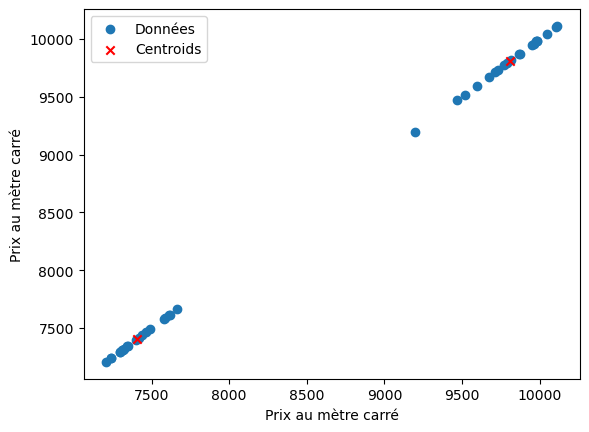

In [122]:
import matplotlib.pyplot as plt

plt.scatter(echantillon_a_classer['prix_m2'], echantillon_a_classer['prix_m2'], label='Données')
plt.scatter(centroids, centroids, marker='x', color='red', label='Centroids')
plt.xlabel('Prix au mètre carré')
plt.ylabel('Prix au mètre carré')
plt.legend()

plt.show() 

In [123]:
predictions_kmeans = kmeans.fit_predict(echantillon_a_classer[['prix_m2']])
predictions_kmeans

C:\Users\lamg1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\lamg1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1])

Nous avons obtenu notre prédiction. Nous pouvons changer les labels et remplacer les valeurs à 0 par Local industriel. commercial ou assimilé et les valeurs à +1 par Appartement. 

Deux options pour appliquer les prédictions : création de la fonction predict_type ou en intégrant le array

In [124]:
def predict_type(prix_m2):
    if prix_m2 < 8500:
        return "1"
    else:
        return "0"

echantillon_a_classer['type_predi'] = echantillon_a_classer['prix_m2'].apply(predict_type)

In [125]:
import pandas as pd

echantillon_a_classer['predictions_kmeans'] = predictions_kmeans
print(echantillon_a_classer.head())

   code_postal               nom_commune  prix_m2 type_predi  \
0        75019  Paris 19e Arrondissement  9871.44          0   
1        75019  Paris 19e Arrondissement 10045.57          0   
2        75019  Paris 19e Arrondissement  9194.70          0   
3        75019  Paris 19e Arrondissement  9469.14          0   
4        75019  Paris 19e Arrondissement  7463.61          1   

   predictions_kmeans  
0                   1  
1                   1  
2                   1  
3                   1  
4                   0  


In [133]:
# Inverser les valeurs 1 et 0 dans les prédictions de KMeans
echantillon_a_classer['predictions_kmeans'] = 1 - echantillon_a_classer['predictions_kmeans']
echantillon_a_classer

,code_postal,nom_commune,prix_m2,type_predi,predictions_kmeans
0,75019,Paris 19e Arrondissement,9871.44,0,0
1,75019,Paris 19e Arrondissement,10045.57,0,0
2,75019,Paris 19e Arrondissement,9194.70,0,0
3,75019,Paris 19e Arrondissement,9469.14,0,0
4,75019,Paris 19e Arrondissement,7463.61,1,1
5,75019,Paris 19e Arrondissement,9982.02,0,0
6,75019,Paris 19e Arrondissement,9674.26,0,0
7,75019,Paris 19e Arrondissement,7348.92,1,1
8,75019,Paris 19e Arrondissement,9789.05,0,0
9,75019,Paris 19e Arrondissement,7616.42,1,1


In [132]:
echantillon_a_classer.drop(('nom_commune'),axis=1)

,code_postal,prix_m2,type_predi,predictions_kmeans
0,75019,9871.44,0,1
1,75019,10045.57,0,1
2,75019,9194.70,0,1
3,75019,9469.14,0,1
4,75019,7463.61,1,0
5,75019,9982.02,0,1
6,75019,9674.26,0,1
7,75019,7348.92,1,0
8,75019,9789.05,0,1
9,75019,7616.42,1,0


In [134]:
# Exporter predictions_extractions au format CSV
predictions_extractions.to_csv('predictions_extractions.csv', index=False)

# Exporter echantillon_a_classer au format CSV
echantillon_a_classer.to_csv('echantillon_a_classer.csv', index=False)

# Milestone 5 - Analyse et présentation des résultats

Mes conclusions sur l'analyse et les limites de l'exercice